In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

In [4]:
path1 = 'C:/Users/samsung/Desktop/수업자료/train.csv'
path2 = 'C:/Users/samsung/Desktop/수업자료/test.csv'
path3 = 'C:/Users/samsung/Desktop/수업자료/sample_submission.csv'


train = pd.read_csv(path1)
test = pd.read_csv(path2)
submission = pd.read_csv(path3)

In [5]:
train.shape, test.shape, submission.shape

((2952, 15), (1022, 14), (150, 2))

In [6]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [56]:
train.isna().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
신분,0
임대보증금,569


In [8]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [9]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [10]:
train.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적',
    '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

test.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형',
    '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수'
]

In [11]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [12]:
local_map = {}

for i,loc in enumerate(train['지역'].unique()):
    local_map[loc] = i

local_map

{'경상북도': 0,
 '경상남도': 1,
 '대전광역시': 2,
 '경기도': 3,
 '전라북도': 4,
 '강원도': 5,
 '광주광역시': 6,
 '충청남도': 7,
 '부산광역시': 8,
 '제주특별자치도': 9,
 '울산광역시': 10,
 '충청북도': 11,
 '전라남도': 12,
 '대구광역시': 13,
 '서울특별시': 14,
 '세종특별자치시': 15}

In [13]:
train['지역'] = train['지역'].map(local_map)
test['지역'] = test['지역'].map(local_map)

train.지역, test.지역

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2947    5
 2948    5
 2949    5
 2950    5
 2951    5
 Name: 지역, Length: 2952, dtype: int64,
 0       3
 1       3
 2       3
 3       3
 4       3
        ..
 1017    1
 1018    4
 1019    4
 1020    4
 1021    4
 Name: 지역, Length: 1022, dtype: int64)

In [14]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5

In [15]:
# 상한100, 하한 15

idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

In [16]:
train['전용면적'].unique()

array([ 35.,  50.,  55.,  30.,  45.,  40.,  25.,  70.,  15.,  20., 100.,
        60.,  75.,  80.,  65.])

In [17]:
columns = ['단지코드', '총세대수', '공가수', '지역', '단지내주차면수',
           '지하철', '버스']
target = '등록차량수'
area_columns = []
for area in train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [18]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [19]:
for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:16, 25.76it/s]
150it [00:05, 27.77it/s]


In [21]:
new_train

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,면적_35.0,면적_50.0,면적_55.0,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
0,C2483,900.0,38.0,0.0,1425.0,0.0,3.0,149.0,665.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1015.0
1,C2515,545.0,17.0,1.0,624.0,0.0,3.0,80.0,132.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
2,C1407,1216.0,13.0,2.0,1285.0,1.0,1.0,0.0,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1064.0
3,C1945,755.0,6.0,3.0,734.0,1.0,3.0,240.0,303.0,212.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0
4,C1470,696.0,14.0,4.0,645.0,0.0,2.0,254.0,246.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,C2586,90.0,7.0,9.0,66.0,0.0,3.0,36.0,0.0,0.0,...,42.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
419,C2035,492.0,24.0,5.0,521.0,0.0,1.0,156.0,0.0,0.0,...,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0
420,C2020,40.0,7.0,8.0,25.0,1.0,2.0,15.0,0.0,0.0,...,5.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
421,C2437,90.0,12.0,11.0,30.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,16.0


In [39]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,0,국민임대,35.0,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,0,국민임대,35.0,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,0,국민임대,50.0,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,0,국민임대,50.0,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,0,국민임대,50.0,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,5,국민임대,45.0,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,5,국민임대,50.0,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,5,국민임대,50.0,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,5,국민임대,50.0,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [22]:
new_train = new_train.fillna(-1)
new_test = new_test.fillna(-1)

In [23]:
x_train = new_train.iloc[:, 1:-1]
y_train = new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [29]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

RandomForestRegressor(n_jobs=-1, random_state=42)

결정계수 :  0.9674251632302495


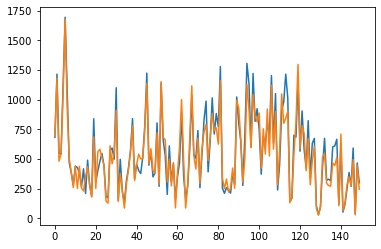

In [55]:
import matplotlib.pyplot as plt

relation_square = model.score(x_train, y_train)
print('결정계수 : ', relation_square)


x_test.단지내주차면수.plot()
plt.plot(pred)

In [38]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [31]:
pred = model.predict(x_test)

In [33]:
submission['num'] = pred

In [34]:
submission

,code,num
0,C1072,694.89
1,C1128,1182.82
2,C1456,481.82
3,C1840,545.32
4,C1332,1047.36
...,...,...
145,C2456,275.95
146,C1266,495.61
147,C2152,29.81
148,C1267,446.52
